In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [39]:
data_df = pd.read_csv("cab_rides.csv")
weather_df = pd.read_csv("weather.csv")


In [40]:
data_df = data_df[data_df['name'] != 'Taxi']

In [41]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [42]:
data_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [43]:
data_df['date_time'] = pd.to_datetime(data_df['time_stamp'], unit='ms')
weather_df['date_time'] = pd.to_datetime(weather_df['time_stamp'], unit='s')

In [44]:
# Weather
weather_df['is_raining'] = weather_df['rain'].apply(lambda x: 1 if x > 0 else 0)

def group_temp(temp):
    if temp < 30:
        return 20
    elif 30 <= temp < 40:
        return 30
    elif 40 <= temp < 50:
        return 40
    else:  # temp >= 50
        return 50

# Create the temp_groups column
weather_df['temp_groups'] = weather_df['temp'].apply(group_temp)


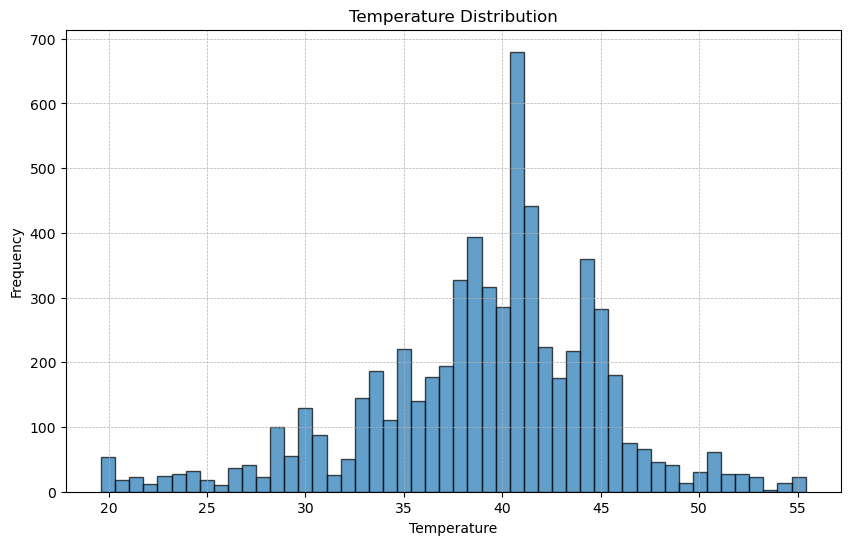

In [45]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10,6))
plt.hist(weather_df['temp'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [46]:
set(data_df['name'])

{'Black',
 'Black SUV',
 'Lux',
 'Lux Black',
 'Lux Black XL',
 'Lyft',
 'Lyft XL',
 'Shared',
 'UberPool',
 'UberX',
 'UberXL',
 'WAV'}

Black/Lux Black/Lux   Black XL/Lux Black Xl     Uber X/Lyft   Lyft XL/Uber XL     UberPool/Shared    WAV    Taxi  

In [47]:

# Ride

def determine_car(car):
    if car == "Black" or car == "Lux Black" or car == "Lux":
        return "Luxury"
    elif car == "Black SUV" or car == "Lux Black XL":
        return "Luxury SUV"
    elif car == "UberX" or car == "Lyft":
        return "Base"
    elif car == "UberXL" or car == "Lyft XL":
        return "Base XL"
    elif car == "UberPool" or car == "Shared":
        return "Shared"
    elif car == "WAV":
        return "Wheel Chair Accessible"
    
# Create the temp_groups column
data_df['car_type'] = data_df['name'].apply(determine_car)


# For 'weekday' column: 1 if it's a weekday, 0 otherwise
data_df['weekday'] = data_df['date_time'].dt.weekday.apply(lambda x: 1 if 0 <= x <= 4 else 0)

# For 'rush_hour' column: 1 if it's rush hour, 0 otherwise
def is_rush_hour(time_obj):
    morning_rush = (time_obj >= pd.Timestamp(time_obj.date()).replace(hour=7)) and (time_obj <= pd.Timestamp(time_obj.date()).replace(hour=9))
    evening_rush = (time_obj >= pd.Timestamp(time_obj.date()).replace(hour=16)) and (time_obj <= pd.Timestamp(time_obj.date()).replace(hour=18))
    return int(morning_rush or evening_rush)

data_df['rush_hour'] = data_df['date_time'].apply(is_rush_hour)




In [49]:
min_date = data_df['date_time'].min()
max_date = data_df['date_time'].max()

print(f"The range of dates is from {min_date} to {max_date}.")


The range of dates is from 2018-11-26 03:40:46.318000 to 2018-12-18 19:15:10.943000.


In [50]:
set(data_df['destination'])

{'Back Bay',
 'Beacon Hill',
 'Boston University',
 'Fenway',
 'Financial District',
 'Haymarket Square',
 'North End',
 'North Station',
 'Northeastern University',
 'South Station',
 'Theatre District',
 'West End'}

In [59]:
merged_df = pd.merge_asof(data_df.sort_values('date_time'), 
                          weather_df.sort_values('date_time'), 
                          on='date_time', 
                          left_by='source', 
                          right_by='location',
                          direction='nearest')

In [60]:
columns = list(merged_df.columns)

In [61]:
columns

['distance',
 'cab_type',
 'time_stamp_x',
 'destination',
 'source',
 'price',
 'surge_multiplier',
 'id',
 'product_id',
 'name',
 'date_time',
 'car_type',
 'weekday',
 'rush_hour',
 'temp',
 'location',
 'clouds',
 'pressure',
 'rain',
 'time_stamp_y',
 'humidity',
 'wind',
 'is_raining',
 'temp_groups']

In [63]:
final_columns = ['distance',
 'cab_type',
 'source',
 'destination',
 'name',
 'car_type',
 'weekday',
 'rush_hour',
 'temp',
 'clouds',
 'pressure',
 'rain',
 'humidity',
 'wind',
 'is_raining',
 'temp_groups',
 'surge_multiplier',
 'price',
]

In [65]:
final_df = merged_df[final_columns]

In [67]:
final_df.to_csv("base_cleaned.csv")